### Credit Card:

#### Problem Statement
The present generation is highly motivated towards the use of credit cards. There are a large number of applications for the credit card and it becomes very tedious for the bank to decide which person should be approved a credit card and which not. The list of defaulters is increasing and this brings trouble for the bank and other customers too. The bank needs ways to minimise this number for the proper functioning of the credit card feature and expand to a wider audience. It is where the role of Machine Learning and Data Science comes into play. The tedious task can be dealt with Machine Learning by training the models with minimized errors.

### Task
The bank has provided the data of customers with certain attributes. You need to predict if the customer would be approved a credit card or not. If the credit card is approved, it is denoted with ‘+’ and if it is not approved then it is denoted
with '-'.


### Classification based on Logistic Regression

### Steps Involved:

1.Importing Data<br>
2.Inspecting Dataframe<br>
3.Data Preparation<br>
4.Train-Test Split<br>
5.Model Building<br>
6.Feature Selection using PCA<br>
7.Model Evaluation<br>
8.Making Predictions on Test Dataset<br>
9.Inferences & Conclusions

### Step 1: Importing  Data

In [126]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:
# importing necessary libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# Importing all datasets
df = pd.read_csv('C:/Users/jigyasu/Downloads/American_Express_Hackathon/American_Express_Hackathon/train_data.csv') 
df.head() 

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [129]:
test = pd.read_csv("C:/Users/jigyasu/Downloads/American_Express_Hackathon/American_Express_Hackathon/test_data.csv") 
test.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


### Step 2: Inspecting the Dataframe

In [130]:
# Let's see the head of  dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              590 non-null object
Age               590 non-null object
Debt              590 non-null float64
Married           590 non-null object
BankCustomer      590 non-null object
EducationLevel    590 non-null object
Ethnicity         590 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           590 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
Key               100 non-null int64
Male              100 non-null object
Age               100 non-null float64
Debt              100 non-null float64
Married           100 non-null object
BankCustomer      100 non-null object
EducationLevel    100 non-null object
Ethnicity         100 non-null object
YearsEmployed     100 non-null float64
PriorDefault      100 non-null object
Employed          100 non-null object
CreditScore       100 non-null int64
DriversLicense    100 non-null object
Citizen           100 non-null object
ZipCode           100 non-null int64
Income            100 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 12.6+ KB


In [132]:
# check out the size of the data

print("Train data shape:", df.shape)
print("Test data shape:", test.shape)

Train data shape: (590, 17)
Test data shape: (100, 16)


In [133]:
# let's look at the statistical aspects of the dataframe

print(df.columns)
print(test.columns)

Index(['Key', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')
Index(['Key', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income'],
      dtype='object')


In [134]:
# let's look at the statistical aspects of the dataframe
df.describe(percentiles=[.25,.5,.75,.90,.95])


,Key,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,4.609390,2.088534,2.045763,918.706780
std,170.462606,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,7.000000,2.500000,2.000000,363.000000
90%,531.100000,11.500000,5.500000,7.000000,2000.000000
95%,560.550000,13.711750,8.590750,11.000000,4000.000000
max,590.000000,26.335000,20.000000,20.000000,100000.000000


In [135]:
test.describe(percentiles=[.25,.5,.75,.90,.95])

,Key,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,33.359400,5.639800,3.019150,4.490000,174.170000,1599.590000
std,29.011492,11.521954,5.624441,4.039917,8.824318,159.721225,6185.926674
min,1.000000,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.397500,1.000000,0.500000,0.000000,0.000000,0.000000
50%,50.500000,30.705000,4.125000,1.667500,1.000000,142.500000,26.000000
75%,75.250000,41.252500,9.508750,4.376250,6.000000,260.000000,509.250000
90%,90.100000,51.897000,12.851500,7.041500,11.100000,400.000000,2323.700000
95%,95.050000,56.428000,14.800500,8.306750,15.100000,491.450000,6010.000000
max,100.000000,58.670000,28.000000,28.500000,67.000000,711.000000,50000.000000


### Step 3: Data Preparation

In [136]:
#checking dublicate values

df[df.duplicated(keep=False)]

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved


In [137]:

test[test.duplicated(keep=False)]

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income


#### There are NO DUPLICATES !!!!

### Dropping the Columns which are not Significant for Analysis.
Such as Key, ZipCode and Citizen
#### As approximately 90% records have Citizen as g category so there is no variability in this feature ..rather Ethnicity could be a significant feature!!!

In [138]:
df= df.drop(['ZipCode','Key', 'Citizen'], axis=1)
test= test.drop(['ZipCode', 'Citizen'], axis=1)

### Checking the Correlation Matrix

In [139]:
# Correlation matrix

cor = df.corr()
cor

,Debt,YearsEmployed,CreditScore,Income
Debt,1.000000,0.256885,0.214485,0.179717
YearsEmployed,0.256885,1.000000,0.291657,0.053319
CreditScore,0.214485,0.291657,1.000000,0.101963
Income,0.179717,0.053319,0.101963,1.000000


In [140]:
cor = test.corr()
cor

,Key,Age,Debt,YearsEmployed,CreditScore,Income
Key,1.000000,0.134394,0.178637,0.204040,0.311959,0.173533
Age,0.134394,1.000000,0.196140,0.549368,0.208317,0.049844
Debt,0.178637,0.196140,1.000000,0.445359,0.415180,-0.127603
YearsEmployed,0.204040,0.549368,0.445359,1.000000,0.392507,0.023368
CreditScore,0.311959,0.208317,0.415180,0.392507,1.000000,-0.027358
Income,0.173533,0.049844,-0.127603,0.023368,-0.027358,1.000000


Age is correlated with YearsEmployed.

PriorDefault is correlated with Approved, Employed and CreditScore.

BankCustomer is highly correlated with Married.

CreditScore is correlated with Employed.



#### Replacing all  '?' with NaN

In [141]:

# Replace the '?'s with NaN

df = df.replace("?",np.NaN)


test = test.replace("?",np.NaN)

#### Checking for missing values

In [142]:
#Checking percentage of missing values in columns

round(100*(df.isnull().sum()/len(df.index)), 2)

Male              1.86
Age               2.03
Debt              0.00
Married           1.02
BankCustomer      1.02
EducationLevel    1.53
Ethnicity         1.53
YearsEmployed     0.00
PriorDefault      0.00
Employed          0.00
CreditScore       0.00
DriversLicense    0.00
Income            0.00
Approved          0.00
dtype: float64

In [143]:
#Checking percentage of missing values in columns

round(100*(test.isnull().sum()/len(test.index)), 2)

Key               0.0
Male              1.0
Age               0.0
Debt              0.0
Married           0.0
BankCustomer      0.0
EducationLevel    0.0
Ethnicity         0.0
YearsEmployed     0.0
PriorDefault      0.0
Employed          0.0
CreditScore       0.0
DriversLicense    0.0
Income            0.0
dtype: float64

#### Replacing  NaNs of a column with most frequent value of that column

In [144]:
# Iterate over each column of df

for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df[col] = df[col].fillna(df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify

print(df.isnull().values.sum())

0


In [145]:
# Iterate over each column of test

for col in test.columns:
    # Check if the column is of object type
    if test[col].dtypes == 'object':
        # Impute with the most frequent value
        test[col] = test[col].fillna(test[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify

print(test.isnull().values.sum())

0


In [146]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,0,-
1,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,122,-
2,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,1004,-
3,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,0,-
4,b,26.5,2.710,y,p,c,v,0.085,f,f,0,f,0,-


In [147]:
test.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,1


In [148]:
df['Age'] = df['Age'].astype(np.float64)

In [149]:
 df['Age'] = df['Age'].apply(np.int64)

In [150]:
 test['Age'] = test['Age'].apply(np.int64)

In [151]:
print(df.head())
print(df.columns)
print(df.shape)

  Male  Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0    b   40  3.500       u            g              i        bb   
1    b   32  1.500       u            g              c         v   
2    b   28  0.585       u            g             aa         v   
3    b   29  0.665       u            g              w         v   
4    b   26  2.710       y            p              c         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense  Income  \
0          0.500            f        f            0              f       0   
1          0.250            f        f            0              t     122   
2          0.040            f        f            0              f    1004   
3          0.250            f        f            0              t       0   
4          0.085            f        f            0              f       0   

  Approved  
0        -  
1        -  
2        -  
3        -  
4        -  
Index(['Male', 'Age', 'Debt', 'Married', 'Ba

In [152]:
print(test.head())
print(test.columns)
print(test.shape)

   Key Male  Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0    1    b   31   0.04       y            p              m         v   
1    2    a   21  11.75       u            g              c         v   
2    3    a   17   0.54       u            g              c         v   
3    4    b   30   0.50       u            g              d         h   
4    5    b   51   2.04       y            p             ff        ff   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense  Income  
0          0.040            f        f            0              f       0  
1          0.250            f        f            0              t       0  
2          1.750            f        t            1              t       5  
3          0.085            f        f            0              t       0  
4          1.500            f        f            0              f       1  
Index(['Key', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity

#### Checking Countplots for Categorical Features

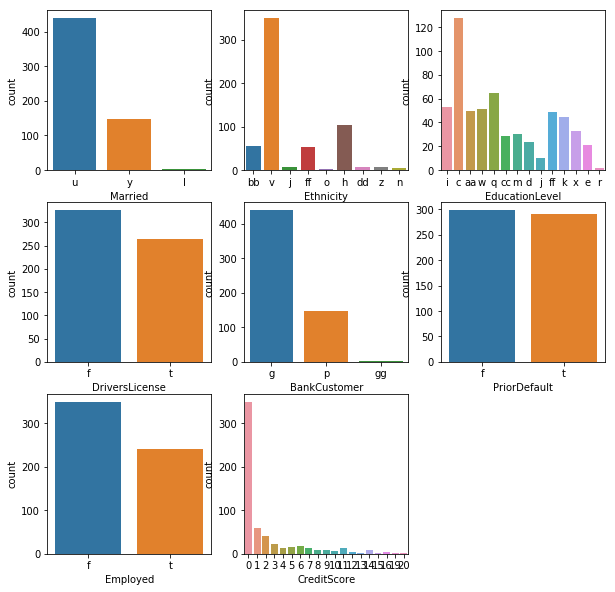

In [153]:
#Drawing the countplot 

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(x="Married",data=df)
plt.subplot(3,3,2)
sns.countplot(x="Ethnicity",data=df)
plt.subplot(3,3,3)
sns.countplot(x="EducationLevel",data=df)
plt.subplot(3,3,4)
sns.countplot(x="DriversLicense",data=df)

plt.subplot(3,3,5)
sns.countplot(x="BankCustomer",data=df)
plt.subplot(3,3,6)
sns.countplot(x="PriorDefault",data=df)

plt.subplot(3,3,7)
sns.countplot(x="Employed",data=df)

plt.subplot(3,3,8)
sns.countplot(x="CreditScore",data=df)

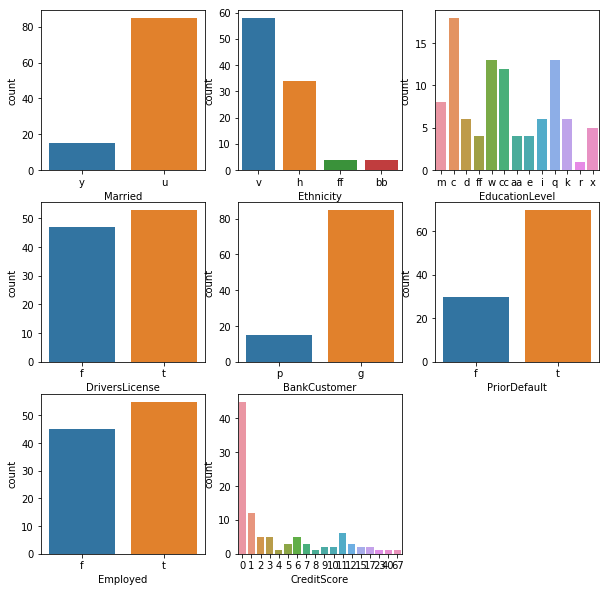

In [154]:
#Drawing the countplot 

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(x="Married",data=test)
plt.subplot(3,3,2)
sns.countplot(x="Ethnicity",data=test)
plt.subplot(3,3,3)
sns.countplot(x="EducationLevel",data=test)
plt.subplot(3,3,4)
sns.countplot(x="DriversLicense",data=test)

plt.subplot(3,3,5)
sns.countplot(x="BankCustomer",data=test)
plt.subplot(3,3,6)
sns.countplot(x="PriorDefault",data=test)

plt.subplot(3,3,7)
sns.countplot(x="Employed",data=test)

plt.subplot(3,3,8)
sns.countplot(x="CreditScore",data=test)

In [155]:
df1=df

In [156]:
df1['Approved']= df['Approved']

In [157]:
df= df.drop(['Approved'], 1)

### For Categorical variables with multiple levels, applying Label Encoding 

In [158]:

# Instantiate LabelEncoder

le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [159]:
# Instantiate LabelEncoder

le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in test.columns:
    # Compare if the dtype is object
    if test[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        test[col]=le.fit_transform(test[col])

#### Replacing + with Yes and  -  with No in 'Approved' (Target) Column

In [160]:
df['Approved'] = df1['Approved'].replace({"+": 't', '-':'f'})

#### Binary Mapping to 'Approved' Column: + is assigned to 1 & - is assigned to 0 

In [161]:


var =  ['Approved']

# Defining the map function
def binary_map(x):
    return x.map({'t': 1, 'f': 0})

# Applying the function to the  list

df[var] = df[var].apply(binary_map)

In [162]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1,40,3.500,1,0,6,0,0.500,0,0,0,0,0,0
1,1,32,1.500,1,0,1,7,0.250,0,0,0,1,122,0
2,1,28,0.585,1,0,0,7,0.040,0,0,0,0,1004,0
3,1,29,0.665,1,0,12,7,0.250,0,0,0,1,0,0
4,1,26,2.710,2,2,1,7,0.085,0,0,0,0,0,0


In [163]:
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Income', 'Approved'],
      dtype='object')

In [164]:
df.shape

(590, 14)

In [165]:
print(test.shape)
print(test.head())
print(test.columns)

(100, 14)
   Key  Male  Age   Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0    1     1   31   0.04        1             1               8          3   
1    2     0   21  11.75        0             0               1          3   
2    3     0   17   0.54        0             0               1          3   
3    4     1   30   0.50        0             0               3          2   
4    5     1   51   2.04        1             1               5          1   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  Income  
0          0.040             0         0            0               0       0  
1          0.250             0         0            0               1       0  
2          1.750             0         1            1               1       5  
3          0.085             0         0            0               1       0  
4          1.500             0         0            0               0       1  
Index(['Key', 'Male', 'Age', 'Debt', 'Mar

### Checking the Outliers 

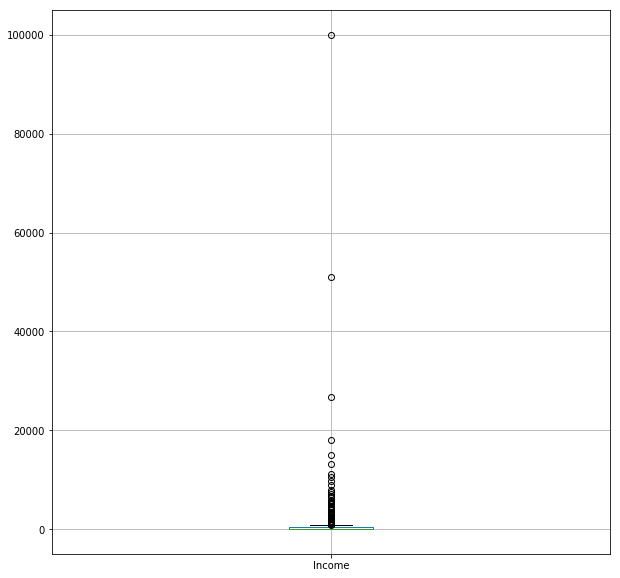

In [166]:
df.boxplot('Income')

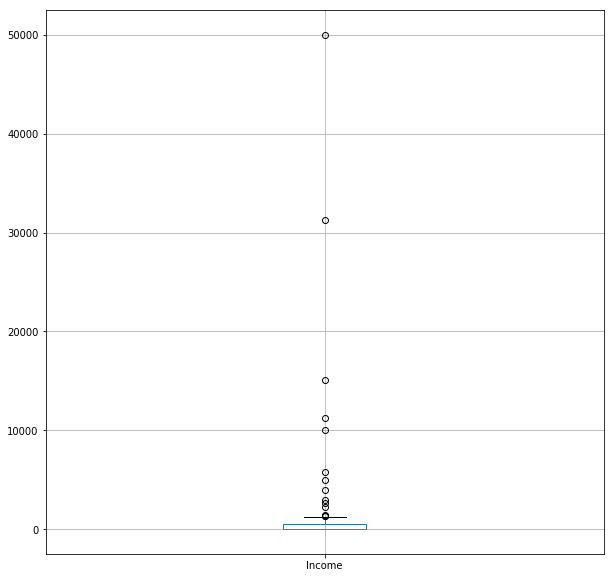

In [167]:
test.boxplot('Income')

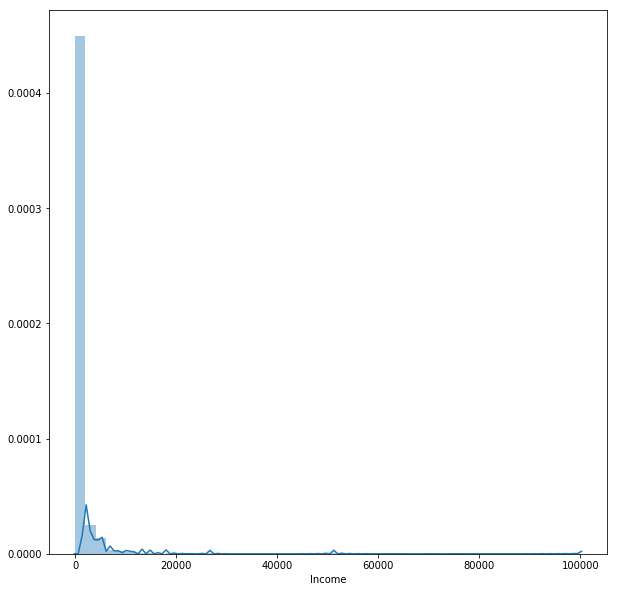

In [168]:
sns.distplot(df['Income'])
plt.show()

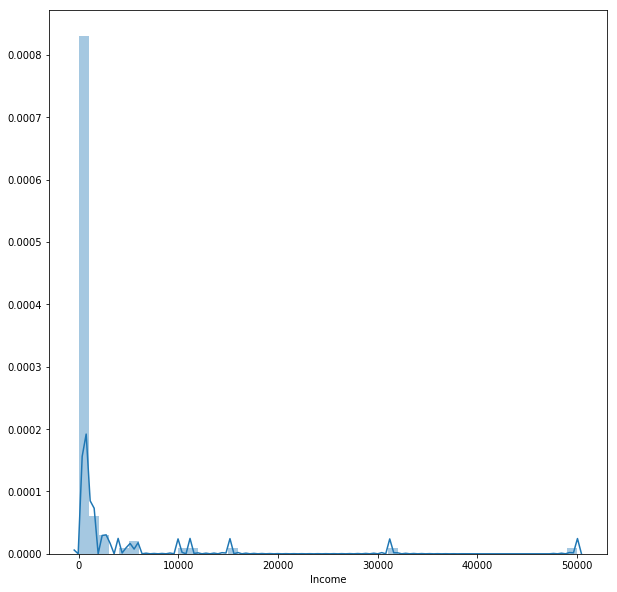

In [169]:
sns.distplot(test['Income'])
plt.show()

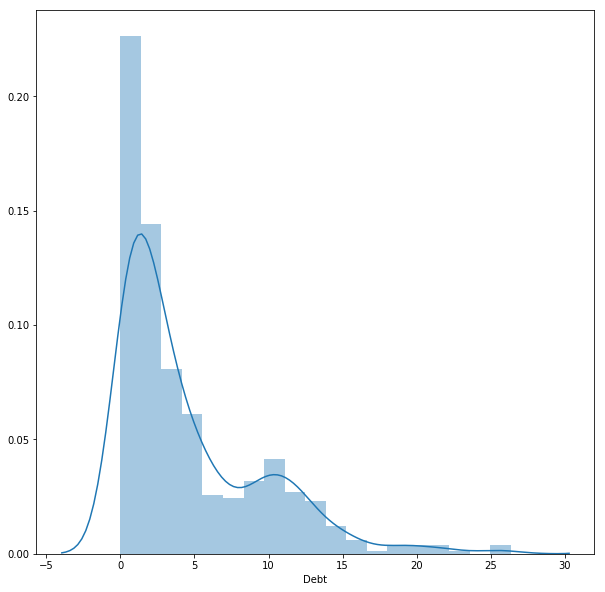

In [170]:
sns.distplot(df['Debt'])
plt.show()

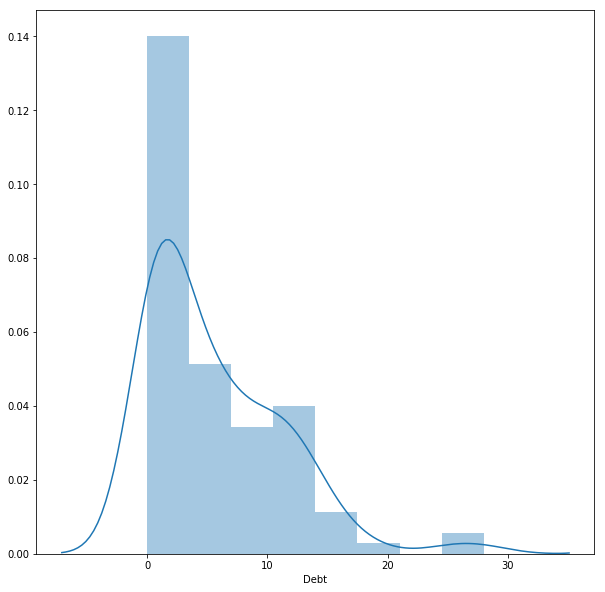

In [171]:
sns.distplot(test['Debt'])
plt.show()

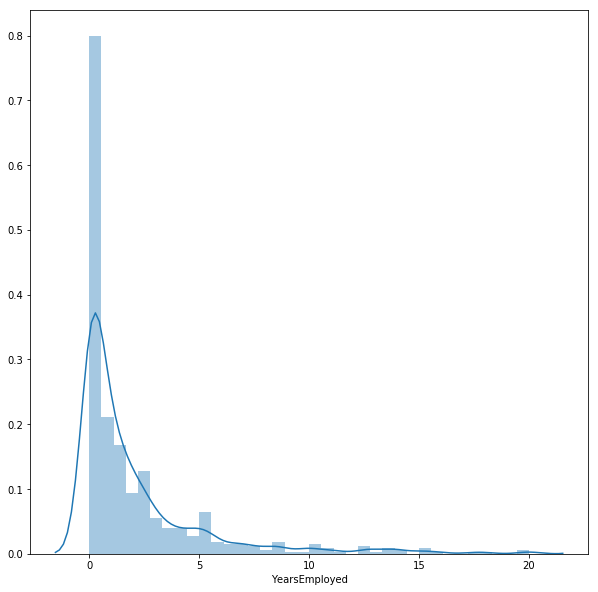

In [172]:
sns.distplot(df['YearsEmployed'])
plt.show()

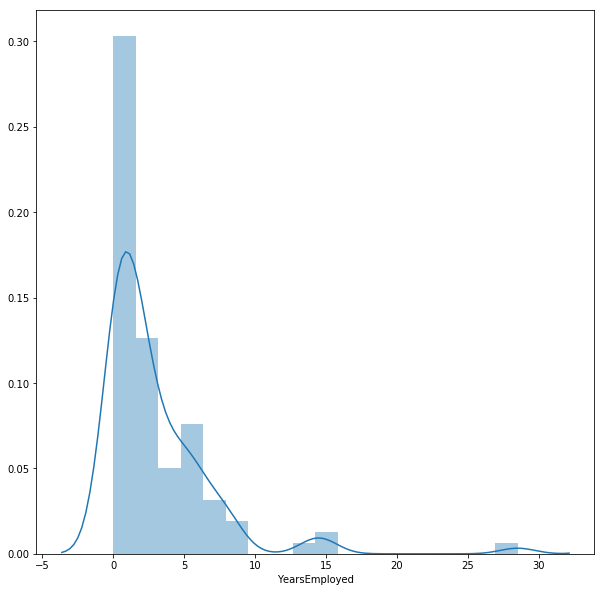

In [173]:
sns.distplot(test['YearsEmployed'])
plt.show()

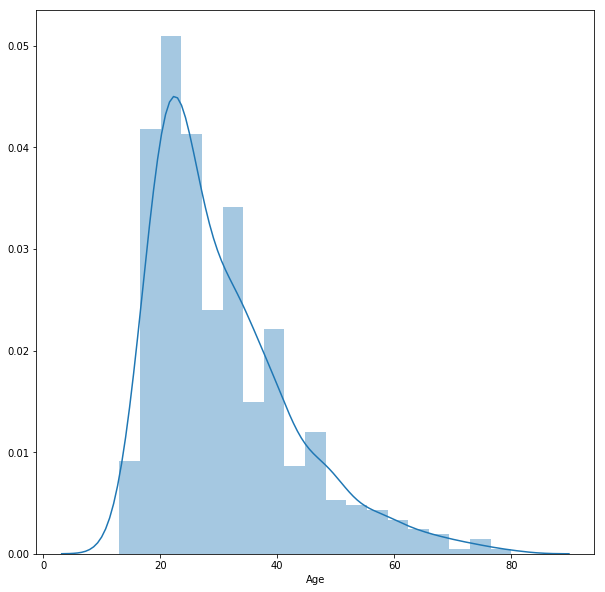

In [174]:
sns.distplot(df['Age'])
plt.show()

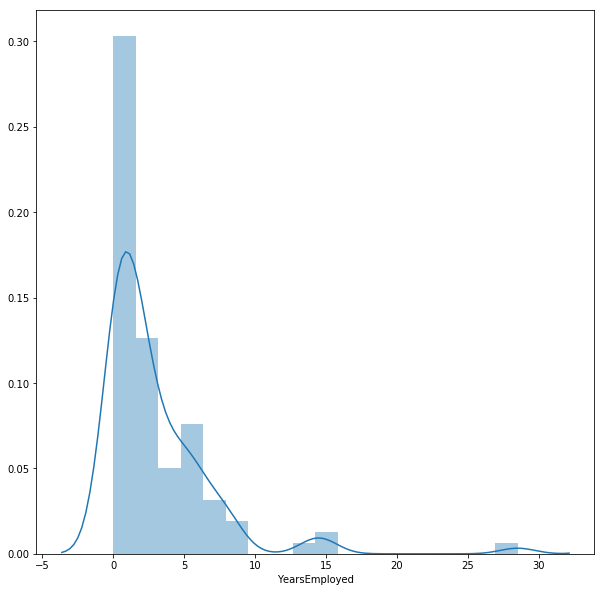

In [175]:
sns.distplot(test['YearsEmployed'])
plt.show()

Distribution is skewed !!!!

#### Caping the Outliers of Income Column above 99 percentile

In [176]:
#Removing top Outliers from 'Income'


Q = df.Income.quantile(0.99)
df= df[~(df.Income > Q)]

df.shape

(584, 14)

In [177]:
#Removing top Outliers from 'Income'


#Q = test.Income.quantile(0.99)
#test= test[~(test.Income > Q)]

test.shape

(100, 14)

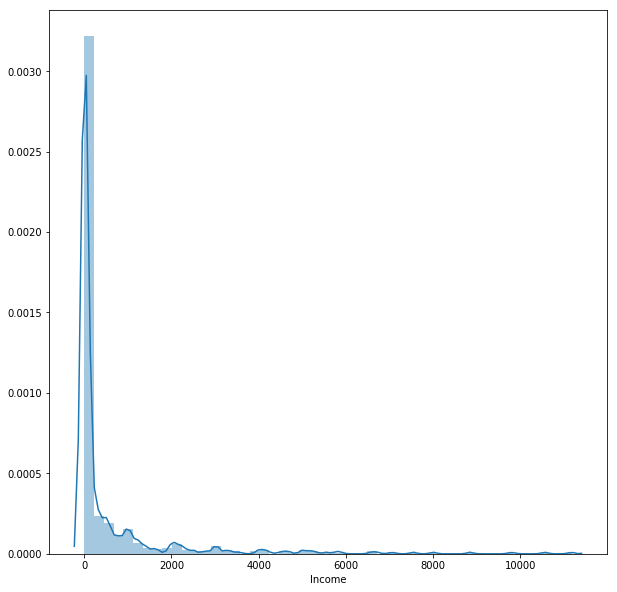

In [178]:
sns.distplot(df['Income'])
plt.show()

In [179]:
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Income', 'Approved'],
      dtype='object')

In [180]:
test.columns

Index(['Key', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Income'],
      dtype='object')

### Step 4:  Train_Test Split 

In [181]:

# Segregate features and labels into separate variables

X = df.drop(['Approved'], axis=1)

y = df['Approved']


In [182]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [183]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(438, 13)
(438,)
(146, 13)
(146,)


In [184]:
### Checking the Approved Rate


Approved = (sum(df['Approved'])/len(df['Approved'].index))*100
Approved

38.6986301369863

#### This is a Balanced Dataset With No Class Imbalance. So we are good to go!!!

In [185]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### PCA

In [186]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [187]:
pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

In [188]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      21.74
1      34.85
2      45.45
3      54.21
4      62.17
5      69.49
6      76.30
7      82.57
8      88.15
9      93.36
10     97.57
11     99.90
12    100.00
dtype: float64


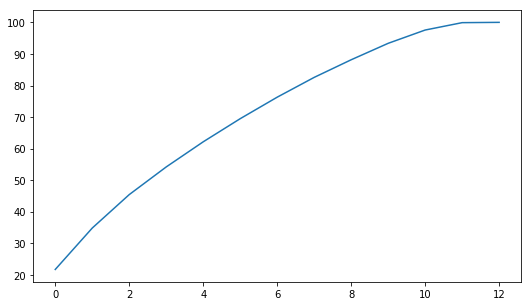

In [189]:
# plot feature variance
# Scree plot

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### PCA & Logistic Regression 

In [190]:
# create pipeline
PCA_VARS = 10
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [191]:
pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [192]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.865296803652968

### Evaluate on test data

In [193]:
# predict on test data

y_pred = pipeline.predict(X_test)

y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [194]:
# create confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[84  6]
 [ 8 48]]
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [195]:
# class balance
y_train.value_counts()/y_train.shape

0    0.611872
1    0.388128
Name: Approved, dtype: float64

In [196]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [8,10], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [197]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   58.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [8, 10], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [198]:
# cross validation results

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041311,0.013994,0.003913,1.811326e-04,0.1,l1,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.735294,0.754098,...,0.769357,0.023259,19,0.779923,0.789474,0.783582,0.768061,0.769231,0.778054,0.008273
1,0.064426,0.062389,0.002718,1.471878e-03,0.1,l1,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.732394,0.776119,...,0.786152,0.031512,8,0.806084,0.830325,0.788104,0.800000,0.802867,0.805476,0.013830
2,0.025674,0.007477,0.005611,1.965505e-03,0.1,l2,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.764706,0.733333,...,0.771360,0.040007,17,0.803089,0.787645,0.770992,0.769231,0.775194,0.781230,0.012682
3,0.043539,0.011191,0.002324,1.332767e-03,0.1,l2,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.782609,0.750000,...,0.789562,0.034052,1,0.817844,0.815884,0.800000,0.814815,0.812950,0.812299,0.006350
4,0.040609,0.007580,0.002437,2.034189e-04,0.5,l1,8,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.776119,0.741935,...,0.769837,0.032443,18,0.798450,0.800000,0.784906,0.772201,0.773946,0.785900,0.011729
5,0.016039,0.002329,0.002539,3.208041e-04,0.5,l1,10,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.753623,0.769231,...,0.786704,0.029951,7,0.820896,0.827338,0.804511,0.804428,0.822695,0.815974,0.009625
6,0.020711,0.004532,0.003553,7.182169e-04,0.5,l2,8,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.757576,0.733333,...,0.762967,0.034111,22,0.815385,0.784615,0.770992,0.772201,0.775194,0.783677,0.016558
7,0.025168,0.007968,0.002223,2.578165e-04,0.5,l2,10,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.764706,0.769231,...,0.785212,0.028855,9,0.813433,0.831541,0.802974,0.811808,0.817204,0.815392,0.009327
8,0.008913,0.003884,0.002539,3.211056e-04,1,l1,8,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.776119,0.733333,...,0.764444,0.036409,20,0.810811,0.792308,0.770992,0.772201,0.776923,0.784647,0.015128
9,0.012894,0.005241,0.003553,1.284064e-03,1,l1,10,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.764706,0.769231,...,0.787599,0.027916,2,0.817844,0.827338,0.804511,0.811808,0.817204,0.815741,0.007518


In [199]:
# print best hyperparameters

print("Best Metric Value: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Metric Value:  0.7895623635100258
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 10}


In [200]:
# predict on test data

y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85  5]
 [15 41]]
AUC:    	 0.9


In [201]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model

Recall1=TP / float(TP+FN)
print(Recall1)

0.7321428571428571


In [203]:
# Let's see the Precision of our logistic regression model

#sklearn.metrics.precision_score(y_test, y_pred)

Precision1= TP / float(TP+FP)
print(Precision1)

0.8913043478260869


In [204]:
F1 = 2 * (Precision1 * Recall1) / (Precision1 + Recall1)
print(F1)

0.8039215686274508


### Random Forest

In [205]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier()

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [206]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [207]:
# print best hyperparameters
print("Best Metric Value: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Metric Value:  0.7954069328528988
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [208]:
# predict on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[86  4]
 [ 9 47]]
AUC:    	 0.95


In [209]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [210]:
# Let's see the sensitivity of RF model
Recall=TP / float(TP+FN)
print(Recall)

0.8392857142857143


In [211]:
# positive predictive value of RF model

Precision= (TP / float(TP+FP))
print(Precision)

0.9215686274509803


In [212]:
F1_score= (2*Precision*Recall)/ (Precision + Recall)
print(F1_score)

0.8785046728971961


###  F1 Score , Sensitivity & Precision are better with Logistic regression  thus the best model is PCA along with Logistic regression.

## Choosing best features

In [213]:
# run a random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, oob_score=True, random_state=4, verbose=1)

4


In [214]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=4, verbose=1, warm_start=False)

In [215]:
# OOB score
rf_model.oob_score_

0.863013698630137

In [216]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives



# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[83  7]
 [12 44]]
ROC:    	 0.95


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [217]:
# Let's see the sensitivity of RF model

recall= TP / float(TP+FN)
print(recall)

0.7857142857142857


In [218]:
# Let's see the precision of RF model

precision=TP / float(TP+FP)
print(precision)

0.8627450980392157


In [219]:
F1_score= (2*precision*recall)/ (precision + recall)
print(F1_score)

0.8224299065420562


### Feature Importance

In [220]:
# predictors
features = df.drop('Approved', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,PriorDefault,31.988071
1,Debt,11.263501
2,Income,10.412894
3,CreditScore,9.868021
4,YearsEmployed,9.842868
5,Age,7.831880
6,EducationLevel,5.580419
7,Employed,4.708008
8,Ethnicity,2.927186
9,DriversLicense,1.470095


### Extracting top 5 features

In [221]:
# extract top 'n' features
top_n = 5
top_features = feature_importance.variables[0:top_n]

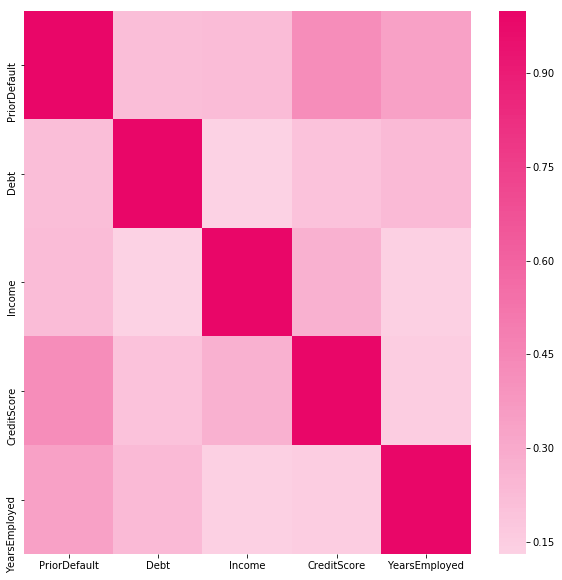

In [222]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [223]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [224]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression())
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [225]:
# fit model

model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  65 out of  80 | elapsed:   57.4s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   57.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [226]:
# print best hyperparameters
print("Best Metric Value: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Metric Value:  0.8214093782466771
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1'}


In [227]:
# predict on test data

y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71 19]
 [ 6 50]]
ROC:    	 0.89


In [228]:
# Sensitivity

Recall_=TP / float(TP+FN)
print(Recall_)


0.8928571428571429


In [229]:
#Precision

Precision_=TP / float(TP+FP)
print(Precision_)


0.7246376811594203


In [230]:
# Specificity

TN / float(TN+FP)

0.7888888888888889

In [231]:
F1_score= (2*Precision_*Recall_)/ (Precision_ + Recall_)
print(F1_score)

0.8


### Extract the intercept and the coefficients from the logistic model 

In [232]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [233]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [234]:
# coefficients
coefficients = logistic_model.coef_.reshape((5, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [235]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,PriorDefault,Debt,Income,CreditScore,YearsEmployed
0,-0.582709,1.404495,0.0,0.324156,0.467856,0.11949


##  PREDICTION ON TEST FILE

In [236]:
test.head()


,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,1,1,31,0.04,1,1,8,3,0.040,0,0,0,0,0
1,2,0,21,11.75,0,0,1,3,0.250,0,0,0,1,0
2,3,0,17,0.54,0,0,1,3,1.750,0,1,1,1,5
3,4,1,30,0.50,0,0,3,2,0.085,0,0,0,1,0
4,5,1,51,2.04,1,1,5,1,1.500,0,0,0,0,1


In [237]:
test[test.duplicated(keep=False)]

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income


In [238]:
test1= test
test= test.drop(['Male', 'Married','EducationLevel',
       'Ethnicity',  'Age' ,'BankCustomer','Employed', 
       'DriversLicense','Key'], axis=1)

test.head()

,Debt,YearsEmployed,PriorDefault,CreditScore,Income
0,0.04,0.040,0,0,0
1,11.75,0.250,0,0,0
2,0.54,1.750,0,1,5
3,0.50,0.085,0,0,0
4,2.04,1.500,0,0,1


#### Predicting on Test file using the final model 

In [239]:
ypredict= model.predict(test)
ypredict[:10]

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [240]:
test['Key']= test1['Key']
test['Approved']= ypredict

In [241]:

print(test.head(20))

      Debt  YearsEmployed  PriorDefault  CreditScore  Income  Key  Approved
0    0.040          0.040             0            0       0    1         0
1   11.750          0.250             0            0       0    2         1
2    0.540          1.750             0            1       5    3         0
3    0.500          0.085             0            0       0    4         0
4    2.040          1.500             0            0       1    5         1
5    5.835          5.500             0            0     150    6         1
6   12.835          0.500             0            0       2    7         1
7    0.835          0.500             0            0     117    8         1
8    2.000          2.000             0            0      17    9         1
9    2.500          0.210             0            0     246   10         1
10   1.040          0.665             0            0     237   11         1
11  10.665          0.085             0           12       3   12         1
12   7.250  

In [242]:
test['Approved']=test['Approved'].replace({0:'-', 1: '+'})

In [243]:
test.head()

,Debt,YearsEmployed,PriorDefault,CreditScore,Income,Key,Approved
0,0.04,0.040,0,0,0,1,-
1,11.75,0.250,0,0,0,2,+
2,0.54,1.750,0,1,5,3,-
3,0.50,0.085,0,0,0,4,-
4,2.04,1.500,0,0,1,5,+


In [244]:
test= test.drop(['Debt', 'YearsEmployed','PriorDefault','CreditScore','Income'], axis=1)


In [245]:
test.head()

,Key,Approved
0,1,-
1,2,+
2,3,-
3,4,-
4,5,+


In [246]:
test.index

RangeIndex(start=0, stop=100, step=1)

In [249]:
test.to_csv('jIGYASU.csv', index=False)

In [ ]:
#test= test[:12]

In [ ]:
test.to_csv('Submission_NidhiG.csv', index=False)